In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')




In [2]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Numerical Columns: Loan ID, Applicant Income, Co-applicant Income, Loan Amount, and Loan amount term

the dataset is having 13 columns  and 614 rows

# EDA: exploratory data Analysis

In [4]:
#chcking shape of the datset
df.shape

(614, 13)

the dataset is having 614rows and 13 columns 

In [5]:
#checking information in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


the dataset having 8 object columns and 1 integer and 4 float columns 

In [6]:
#checking unique values 
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
#cheking variables in perticular columns 
df.groupby(['Credit_History']).size()

Credit_History
0.0     89
1.0    475
dtype: int64

In [8]:
df.groupby(['Education']).size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [9]:
df.groupby(['Self_Employed']).size()

Self_Employed
No     500
Yes     82
dtype: int64

In [10]:
df.groupby(['Property_Area']).size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

# checking data discription

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Documentation :
    
    -missing values is present in the   Loan amount coulmn so first filling the missing values by mean 
    
    -std deviation is too high and  outliers is present in almost all columns so that can remove by zscore method

# checking null values 

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

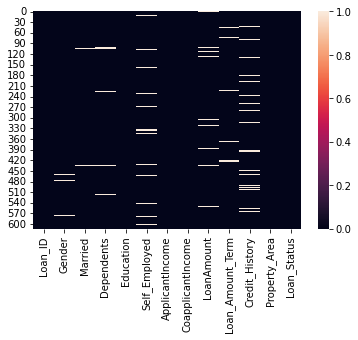

In [13]:
sns.heatmap(df.isnull())

null values is present in 'Gender ,married,dependents,self_employed,loanamount,loan_amount_term,credit_history in this columns

# Imputing the missing values:

In [14]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

no null values is present now

# 

# dropping unwanted columns 

In [16]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

dropping Loan_id  column bcz this is nominal data  or unique values are present

# checking target variable by plotting countplot

<AxesSubplot:>

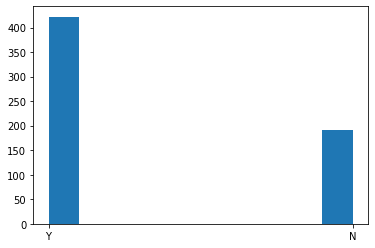

In [17]:
df['Loan_Status'].hist(grid=False)

In [18]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

so we can see our data is balanced 

# Transformation Techniques to convert object data into numeric data

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#by using for loop here we encoded the object columns
for col in df:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1


We map the values so that we can input the train data into the model as the model does not accept any string values.

now all object columns is encoded

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Univariate Analysis

plotting countplot  because our data is categorical 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

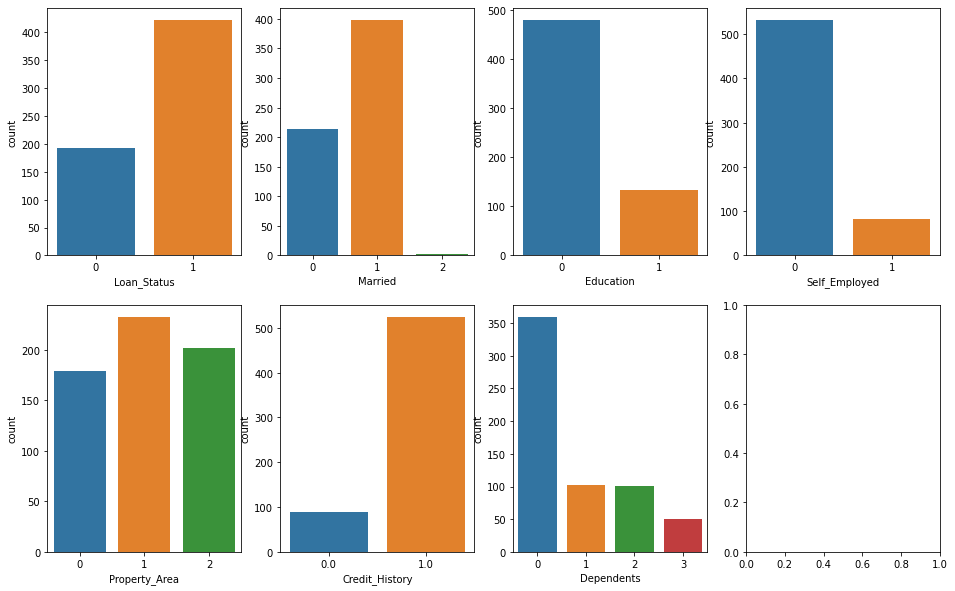

In [25]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=df,ax=ax[0][0])
sns.countplot('Married',data=df,ax=ax[0][1])
sns.countplot('Education',data=df,ax=ax[0][2])
sns.countplot('Self_Employed',data=df,ax=ax[0][3])
sns.countplot('Property_Area',data=df,ax=ax[1][0])
sns.countplot('Credit_History',data=df,ax=ax[1][1])
sns.countplot('Dependents',data=df,ax=ax[1][2])

Observations:

More Loans are approved Vs Rejected

Count of Male applicants is more than Female

Count of Married applicant is more than Non-married

Count of graduate is more than non-Graduate

Count of self-employed is less than that of Non-Self-employed

Maximum properties are located in Semiurban areas

Credit History is present for many applicants

The count of applicants with several dependents=0 is maximum



# checking correlation matrix

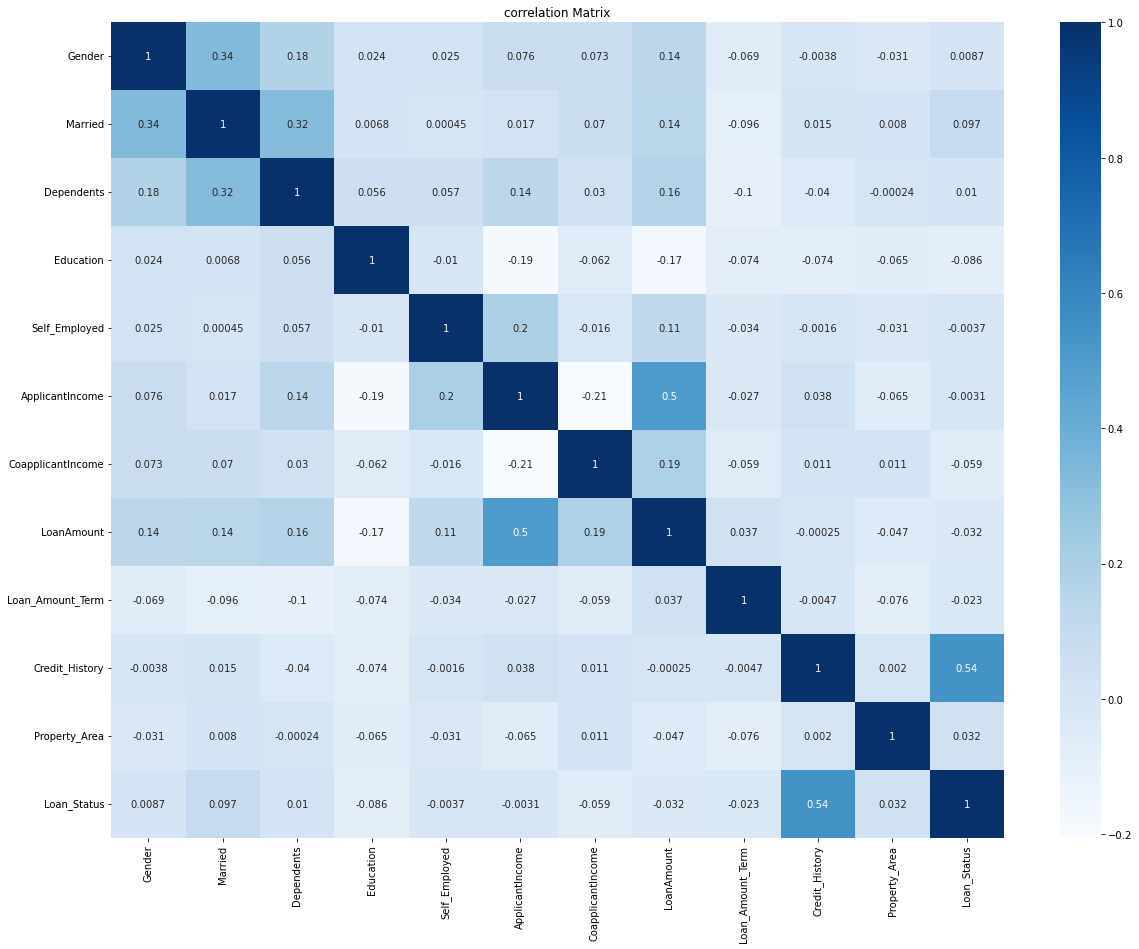

In [26]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[20,15])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

Documentation:


in this  matrix we can see no multicollinearity problem exist so we cannot drop any column 

here we can see all columns are dependent on label orwe can say all columns are ontributing for the label so all are important columns

# checking correlation with Attrition output column

In [27]:
corr_mat['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.096657
Property_Area        0.032112
Dependents           0.010118
Gender               0.008690
ApplicantIncome     -0.003123
Self_Employed       -0.003700
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

# Data Distribution with graph

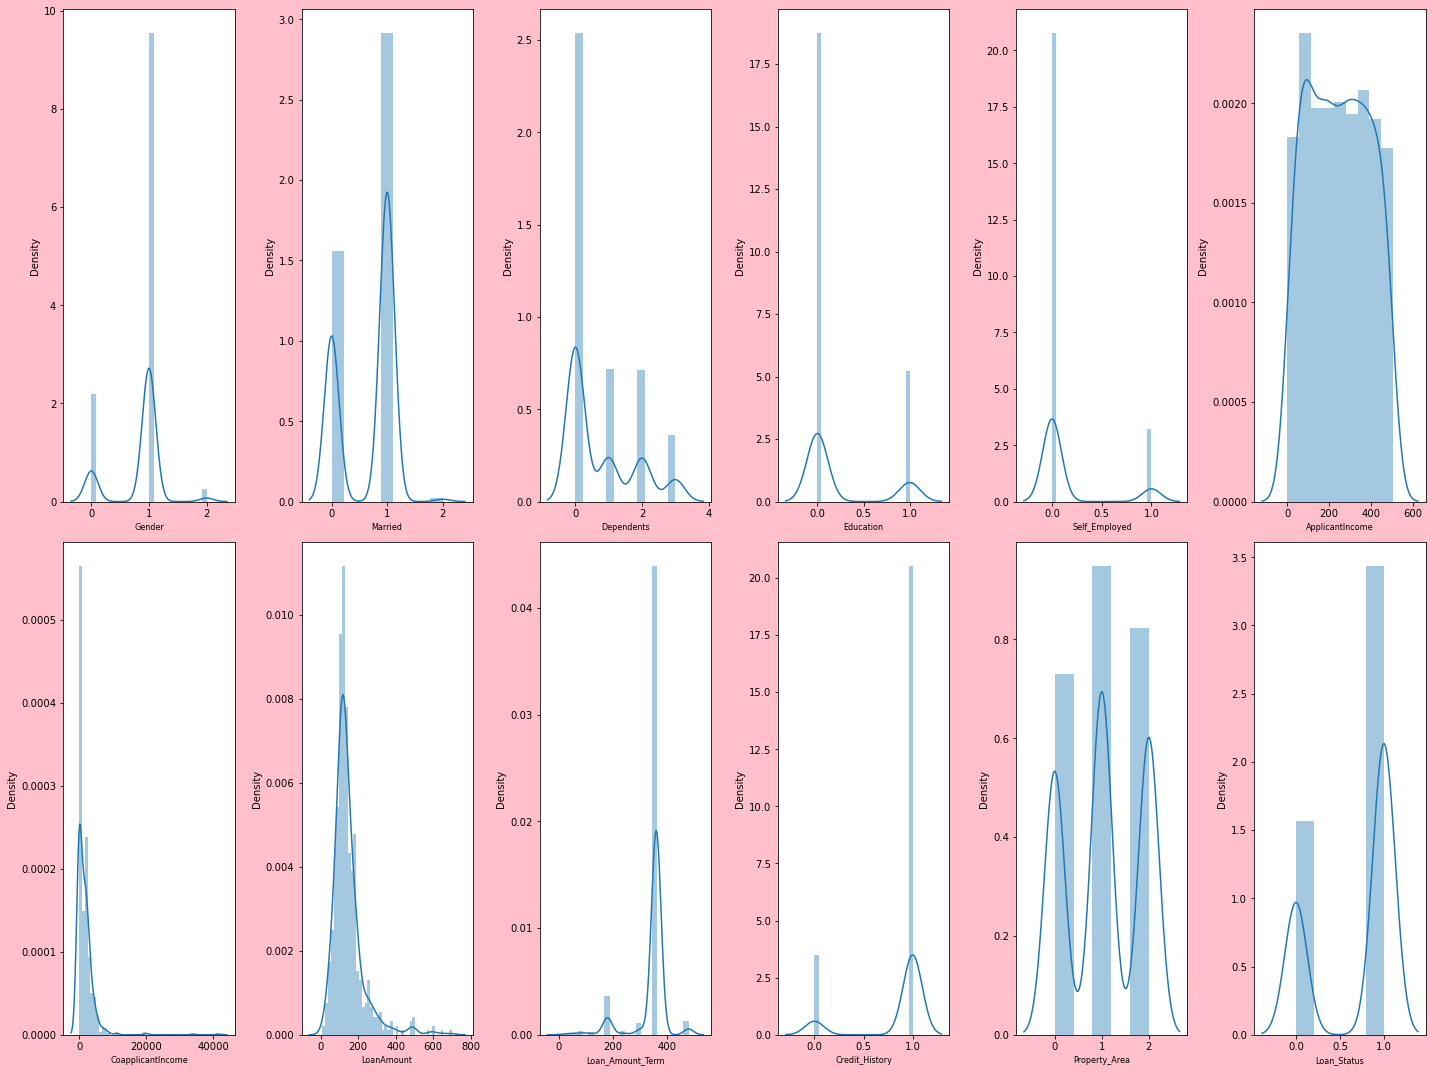

In [28]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

Here many columns we can see are not normalised. Skeness are present in almost all columns

# checking and removing Outliers

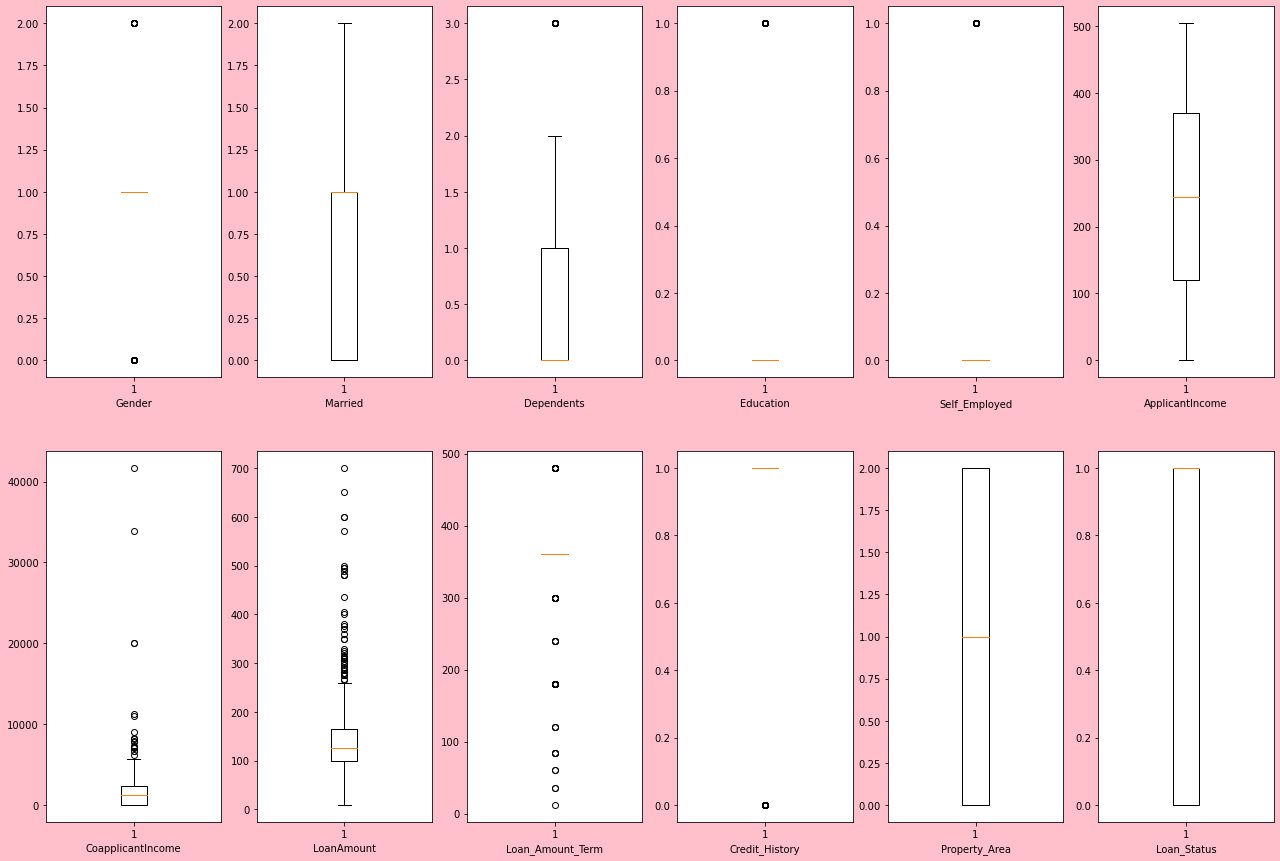

In [29]:
#checking one more time
plt.figure(figsize=(22,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()


outliers is present in the Education ,self_employeed,coapplicationincome,loanamount,loan_amounta_term,credit_history

# Removing the outliers by zscore method

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.382616,1.357847,0.737806,0.528362,0.392601,0.898633,0.554487,0.302759,0.273231,0.411733,1.223298,0.674519
1,0.382616,0.705812,0.253470,0.528362,0.392601,0.410559,0.038732,0.207648,0.273231,0.411733,1.318513,1.482537
2,0.382616,0.705812,0.737806,0.528362,2.547117,0.753846,0.554487,0.944757,0.273231,0.411733,1.223298,0.674519
3,0.382616,0.705812,0.737806,1.892641,0.392601,1.095498,0.251980,0.302759,0.273231,0.411733,1.223298,0.674519
4,0.382616,1.357847,0.737806,0.528362,0.392601,0.933495,0.554487,0.053093,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.990376,1.357847,0.737806,0.528362,0.392601,0.851461,0.554487,0.885313,0.273231,0.411733,1.318513,0.674519
610,0.382616,0.705812,2.236021,0.528362,0.392601,0.194412,0.554487,1.253868,2.522836,0.411733,1.318513,0.674519
611,0.382616,0.705812,0.253470,0.528362,0.392601,1.282119,0.472404,1.278459,0.273231,0.411733,1.223298,0.674519
612,0.382616,0.705812,1.244745,0.528362,0.392601,1.219367,0.554487,0.493794,0.273231,0.411733,1.223298,0.674519


In [37]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
       308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
       546, 561, 575, 581, 585, 600, 604], dtype=int64), array([6, 8, 8, 8, 7, 8, 7, 7, 6, 7, 8, 8, 7, 7, 8, 7, 7, 6, 6, 7, 7, 8,
       8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7], dtype=int64))


In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1


all outlier are removed no we can proceed ahead

# Seperation of Input and Output Columns

In [39]:
X=df_new.drop('Loan_Status',axis=1) # features
y=df_new.Loan_Status                 # label

# Checking skewness

In [40]:
X.skew().sort_values(ascending=False)

Self_Employed        2.244210
CoapplicantIncome    1.348959
Education            1.319920
LoanAmount           1.243160
Dependents           1.044261
ApplicantIncome      0.044622
Property_Area       -0.048661
Married             -0.524327
Gender              -0.960019
Credit_History      -1.971149
Loan_Amount_Term    -2.112269
dtype: float64

# Using Power_transform method to remove the skewness

In [41]:
from sklearn.preprocessing import power_transform

In [42]:
x_new=power_transform(X)

In [43]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

4     2.244210
3     1.319920
8     0.736750
2     0.467609
0     0.220467
7     0.046979
10   -0.152602
6    -0.181155
5    -0.254104
1    -0.304621
9    -1.971149
dtype: float64

In [44]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

Self_Employed        2.244210
Education            1.319920
Loan_Amount_Term     0.736750
Dependents           0.467609
Gender               0.220467
LoanAmount           0.046979
Property_Area       -0.152602
CoapplicantIncome   -0.181155
ApplicantIncome     -0.254104
Married             -0.304621
Credit_History      -1.971149
dtype: float64

In [45]:
x=pd.DataFrame(x_new,columns=X.columns)

In [46]:
x.skew().sort_values(ascending=False)

Self_Employed        2.244210
Education            1.319920
Loan_Amount_Term     0.736750
Dependents           0.467609
Gender               0.220467
LoanAmount           0.046979
Property_Area       -0.152602
CoapplicantIncome   -0.181155
ApplicantIncome     -0.254104
Married             -0.304621
Credit_History      -1.971149
dtype: float64

After power Transform we can see Self_Employed ,Education,Loan_Amount_Term    skwness is still there so we will handle this seperatly

In [47]:
sk=x.skew()

In [48]:
sk[np.abs(sk)>0.5]

Education           1.319920
Self_Employed       2.244210
Loan_Amount_Term    0.736750
Credit_History     -1.971149
dtype: float64

In [49]:
x.skew()[np.abs(x.skew())<0.5].all()

True

In [50]:
x.skew().sort_values(ascending=False)

Self_Employed        2.244210
Education            1.319920
Loan_Amount_Term     0.736750
Dependents           0.467609
Gender               0.220467
LoanAmount           0.046979
Property_Area       -0.152602
CoapplicantIncome   -0.181155
ApplicantIncome     -0.254104
Married             -0.304621
Credit_History      -1.971149
dtype: float64

In [116]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.314549,-1.329701,-0.814463,-0.538949,-0.381666,0.936728,-1.115765,-0.151331,0.129897,0.419235,1.199571
1,0.314549,0.686739,0.888792,-0.538949,-0.381666,0.513201,0.751320,0.000782,0.129897,0.419235,-1.338467
2,0.314549,0.686739,-0.814463,-0.538949,2.620089,-0.650588,-1.115765,-1.432692,0.129897,0.419235,1.199571
3,0.314549,0.686739,-0.814463,1.855464,-0.381666,-1.066864,0.900672,-0.151331,0.129897,0.419235,1.199571
4,0.314549,-1.329701,-0.814463,-0.538949,-0.381666,0.965998,-1.115765,0.234147,0.129897,0.419235,1.199571
...,...,...,...,...,...,...,...,...,...,...,...
577,-1.804650,-1.329701,-0.814463,-0.538949,-0.381666,-0.764096,-1.115765,-1.287906,0.129897,0.419235,-1.338467
578,0.314549,0.686739,1.530271,-0.538949,-0.381666,0.316204,-1.115765,-2.345595,-2.572367,0.419235,-1.338467
579,0.314549,0.686739,0.888792,-0.538949,-0.381666,1.252478,0.186479,1.791679,0.129897,0.419235,1.199571
580,0.314549,0.686739,1.336594,-0.538949,-0.381666,1.201705,-1.115765,0.953750,0.129897,0.419235,1.199571


here we can see,from All column Skwness got removed except Self_Employed ,Education ,Loan_Amount_Term having skewness  

# Model Prediction

# Using  RandomForest Classifier 

In [56]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.864406779661017 Random state 0.1
Best accuracy is 86.4406779661017 on Random state 0.1


In [57]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7828571428571428 Random state 1
accuracy 0.7885714285714286 Random state 4
accuracy 0.8057142857142857 Random state 5
accuracy 0.8342857142857143 Random state 11
accuracy 0.8457142857142858 Random state 19
accuracy 0.8514285714285714 Random state 219
accuracy 0.8571428571428571 Random state 466
Best accuracy is 85.71428571428571 on Random state 466


In [58]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=19) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.864406779661017
[[ 7  5]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.90      0.94      0.92        47

    accuracy                           0.86        59
   macro avg       0.80      0.76      0.78        59
weighted avg       0.86      0.86      0.86        59



Random forest is giving 86.44% accuracy

In [59]:
x_train.shape

(523, 11)

In [60]:
y_train.shape

(523,)

In [61]:
x_test.shape

(59, 11)

In [62]:
y_test.shape

(59,)

# Logistic Regression model 

In [63]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7966101694915254 Random state 0.1
accuracy 0.8 Random state 0.12
accuracy 0.9090909090909091 Random state 0.15
Best accuracy is 90.9090909090909 on Random state 0.15


In [64]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8636363636363636 Random state 1
accuracy 0.875 Random state 5
accuracy 0.9204545454545454 Random state 19
Best accuracy is 92.04545454545455 on Random state 19


In [65]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15,random_state=19)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 92.04545454545455
[[1200  700]
 [   0 6900]]


logistic regression is giving 92.04% accuracy

# Support vector classifier

In [66]:
#finding the best test_SIZE
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7966101694915254 Random state 0.1
accuracy 0.8923076923076924 Random state 0.11
Best accuracy is 89.23076923076924 on Random state 0.11


In [67]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8615384615384616 Random state 1
accuracy 0.8923076923076924 Random state 5
accuracy 0.9076923076923077 Random state 19
Best accuracy is 90.76923076923077 on Random state 19


In [68]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=19)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 90.76923076923077
[[ 900  500]
 [ 100 5000]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.9

svc is giving 90.76% accuracy

# KNeighborsClassifier Model

In [69]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7966101694915254 Random state 0.1
accuracy 0.8615384615384616 Random state 0.11
Best accuracy is 86.15384615384616 on Random state 0.11


In [70]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7846153846153846 Random state 1
accuracy 0.8153846153846154 Random state 2
accuracy 0.8461538461538461 Random state 3
accuracy 0.8923076923076924 Random state 19
Best accuracy is 89.23076923076924 on Random state 19


In [71]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=19)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 89.23076923076924
[[ 900  500]
 [ 200 4900]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.91      0.96      0.93        51

    accuracy                           0.89        65
   macro avg       0.86      0.80      0.83        65
weighted avg       0.89      0.89      0.89        65
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.91      0.96      0.93        51

    accuracy                           0.89        65
   macro avg       0.86      0.80      0.83        65
weighted avg       0.89      0.89      0.89        65
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.91      0.96      0.93        51

    accuracy                           0.89        65
   macro avg       0.86      0.80      0.83        65
weighted avg       0.8

knc is giving 89.23% accuracy

# GaussianNB model

In [72]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [73]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.847457627118644 Random state 0.1
accuracy 0.8571428571428571 Random state 0.12
accuracy 0.8828828828828829 Random state 0.19
Best accuracy is 88.28828828828829 on Random state 0.19


In [74]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.19,random_state=i)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8648648648648649 Random state 1
accuracy 0.8738738738738738 Random state 4
accuracy 0.8828828828828829 Random state 72
Best accuracy is 88.28828828828829 on Random state 72


In [75]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.19,random_state=72)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
acc=gn.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 88.28828828828829
[[2600 1200]
 [ 100 7200]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.86      0.99      0.92        73

    accuracy                           0.88       111
   macro avg       0.91      0.84      0.86       111
weighted avg       0.89      0.88      0.88       111
              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.86      0.99      0.92        73

    accuracy                           0.88       111
   macro avg       0.91      0.84      0.86       111
weighted avg       0.89      0.88      0.88       111
              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.86      0.99      0.92        73

    accuracy                           0.88       111
   macro avg       0.91      0.84      0.86       111
weighted avg       0.8

GaussianNB is giving 88.28% accuracy

# Desicion Tree classifier model

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [77]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.711864406779661 Random state 0.1
accuracy 0.7613636363636364 Random state 0.15
accuracy 0.7777777777777778 Random state 0.17
accuracy 0.7804878048780488 Random state 0.21
Best accuracy is 78.04878048780488 on Random state 0.21


In [78]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.21,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7804878048780488 Random state 1
accuracy 0.7886178861788617 Random state 24
Best accuracy is 78.86178861788618 on Random state 24


In [79]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.21,random_state=24)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 78.86178861788618
[[1800 1600]
 [1000 7900]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        34
           1       0.83      0.89      0.86        89

    accuracy                           0.79       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.78      0.79      0.78       123
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        34
           1       0.83      0.89      0.86        89

    accuracy                           0.79       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.78      0.79      0.78       123
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        34
           1       0.83      0.89      0.86        89

    accuracy                           0.79       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.7

Desicion tree clasifier is giving 78.86% accuracy

# Logistic regression is giving highest accuracy ,now we will check validaion score of the all models

# Cross Validatiion

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
#linear regression
scr=cross_val_score(lr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8179339817270851


In [82]:
#desiciontree classifier
scr=cross_val_score(dt,x,y)
print('cross validation score',scr.mean())

cross validation score 0.6993810786914236


In [84]:
#random forest classifier
scr=cross_val_score(rf,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7990568818155026


In [85]:
#SVC
scr=cross_val_score(sv,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8213675213675213


In [86]:
#KNC 
scr=cross_val_score(knc,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7870026525198939


In [87]:
scr=cross_val_score(gn,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8179487179487179


support vector Classifier is giving highest vaidation score

so support vector Classifier is performing better among all so we will continue with support vector classifier



# Using Hyperparameter tunning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(x_train,y_train)

grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [92]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=19)
sv=SVC(C=100, gamma=0.01, kernel='sigmoid')
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 90.76923076923077
[[ 900  500]
 [ 100 5000]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.9

In [94]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


[[ 9  5]
 [ 2 49]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.91      0.96      0.93        51

    accuracy                           0.89        65
   macro avg       0.86      0.80      0.83        65
weighted avg       0.89      0.89      0.89        65



# by using hyper parameter tunning accurac is 89 %

# plot the ROC corve

In [95]:
y_pred=sv.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [97]:
fpr,tpr,thresholds

(array([0.        , 0.98039216, 1.        ]),
 array([0.        , 0.35714286, 1.        ]),
 array([2, 1, 0]))

In [98]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.98039216 1.        ]
True positive rate [0.         0.35714286 1.        ]


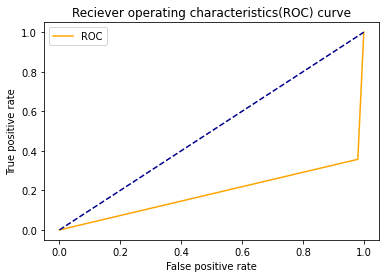

In [99]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [100]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

81.1624649859944


# Classification Report

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.91      0.98      0.94        51

    accuracy                           0.91        65
   macro avg       0.90      0.81      0.85        65
weighted avg       0.91      0.91      0.90        65



# saving the model in pickel format

In [102]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"loan.pk1")

['loan.pk1']

# Testing Model with Future Data for output

In [103]:
x.iloc[0]

Gender               0.314549
Married             -1.329701
Dependents          -0.814463
Education           -0.538949
Self_Employed       -0.381666
ApplicantIncome      0.936728
CoapplicantIncome   -1.115765
LoanAmount          -0.151331
Loan_Amount_Term     0.129897
Credit_History       0.419235
Property_Area        1.199571
Name: 0, dtype: float64

In [105]:
y.iloc[0]

1

we will take exist data as sample data to compare predict output

In [117]:
t=np.array([0.314549,-1.329701,-0.814463,-0.538949,-0.381666,0.936728,-1.115765,-0.151331,0.129897,0.419235,1.199571])

In [118]:
t.shape

(11,)

In [119]:
x_train.shape

(517, 11)

In [121]:
t=t.reshape(1,-1)
t.shape

(1, 11)

In [123]:
sv.predict(t)

array([1])

The predicted Output for Loan_status is matching with Actual otput and predicted output 